In [1]:
using Luxor, LightXML

In [2]:
pointradius = 4
linewidth = 2;

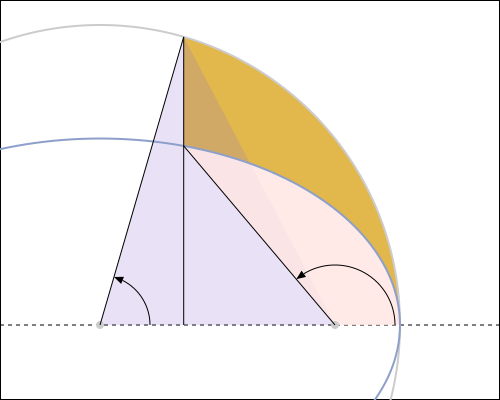

In [77]:
drawing_height = 400
drawing_width = 500
Drawing(drawing_width, drawing_height, :svg)
box(O, Point(drawing_width, drawing_height), :stroke)
# bbox = BoundingBox(;centered=false)
x_axis_height = 13/16*drawing_height
origin(drawing_width/2, x_axis_height)

@layer begin
    setdash("dash")
    setline(linewidth/2)
    rule(O)
end

origin(100, x_axis_height)
semimajor = 300
periapsis = Point(semimajor, 0)
r_p = 65
m1 = Point(semimajor - r_p, 0)
e = 1 - r_p/semimajor
semiminor = -semimajor * sqrt(1 - e^2)
epoly = ellipse(m1, -m1, 2semimajor, vertices=true)
B = epoly[60]
angle = slope(m1, B)
circle_point = B * Point(1, -semimajor/semiminor)
angle_E = slope(O, circle_point)

@layer begin
    setcolor(sethue("goldenrod")..., 0.8)
    move(periapsis)
    poly(epoly[60:101])
    carc(O, semimajor, 0, angle_E)
    fillpath()
end
@layer begin
    setcolor(sethue("mediumpurple")..., 0.2)
    move(O)
    line(circle_point)
    line(m1)
    line(O)
    fillpath()
end
@layer begin
    setcolor(sethue("mistyrose")..., 0.8)
    move(epoly[60])
    poly(epoly[60:101])
    line(m1)
    line(epoly[60])
    fillpath()
end

@layer begin
    setcolor("gray80")
    circle(m1, pointradius, :fill)
    circle(O, semimajor, :stroke)
    circle(O, pointradius, :fill)
end
@layer begin
    setcolor(141/255, 160/255, 203/255, 1.0)
    poly(epoly, :stroke)
end
@layer begin
    setline(linewidth/2)
    line(m1, B, :stroke)
    arrow(m1, semimajor/5, 0, angle, clockwise=false)
    arrow(O, 50, 0, angle_E, clockwise=false)
    line(Point(B.x, 0), circle_point, :stroke)
    line(O, circle_point, :stroke)
    # line(m1, circle_point, :stroke)
end

top_left_corner = getworldposition(Point(0, 0), centered=false)
finish()
preview()